In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#### 1. Load the .csv file into a variable (here df)

In [2]:
df = pd.read_csv('churn.csv')
df.head()  # shows the first 5 rows of df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


by `.info()` we can see the information about our dataset. pay attension to NULL items and Dtype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

#### 2. Delete the un-nessesory columns with drop function
`inplace=True` will replace the result in the variable (here df).

set `axis=0` will remove row and `axis=1` removes column

`errors="ignore"` will ignore the error if the was no such columns or rows to delete

In [4]:
df.drop(['Account Length', 'Phone'], axis=1, inplace=True, errors="ignore")
df.head()

,State,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


`.unique()` print out all the unique items in an specified column

In [5]:
df['Churn?'].unique()

array(['False.', 'True.'], dtype=object)

#### 3. there should be NO space or blank in the names. so we should replace them with under score. following command will replace it in only `State` column. 
`regex=True` is regular expression and is just an advanced feature for search and replace 


In [6]:
df['State'].replace(to_replace=' ',value='_',regex=True, inplace=True)

following command will show first 10 items of `.unique()`

In [7]:
df['State'].unique()[0:10]

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN'],
      dtype=object)

#### 4. replace the space and blanks in the name of all columns (if any)

In [8]:
df.columns = df.columns.str.replace(pat=' ', repl="_")
df.head()

,State,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### 5. We should do some steps to find the missing data and replace them with `0`

#### a. see the data type of all columns
if the data-type is `object` it means that it contains more than one data type. so it is possible to have some sort of missing 
data or irrelevant data there.

NOTE: XGBOOST only allows int, float or boolean. other data types should be converted into these numeric types.

In [9]:
df.dtypes

State              object
Area_Code           int64
Int'l_Plan         object
VMail_Plan         object
VMail_Message       int64
Day_Mins          float64
Day_Calls           int64
Day_Charge        float64
Eve_Mins          float64
Eve_Calls           int64
Eve_Charge        float64
Night_Mins        float64
Night_Calls         int64
Night_Charge      float64
Intl_Mins         float64
Intl_Calls          int64
Intl_Charge       float64
CustServ_Calls      int64
Churn?             object
dtype: object

#### b. to check the content of a column we can use `.unique()` to see all the contents. This check should be done for all `object` type columns. here we only do if for `Int'l_Plan` column.

In [10]:
df["Int'l_Plan"].unique()

array(['no', 'yes'], dtype=object)

#### c. if a column data-type is `object` but we are sure that it should contain only numerical data-type, we can use following command. if it gave error you can find the place of irrelevant data or spaces. (here `Day_Mins` is an instace column name.)
the error will be some thing like below:

`ValueError: Unable to parse string " " at position 2234`

In [11]:
df['Day_Mins'] = pd.to_numeric(df['Day_Mins'])

#### d. to find the exact location and number of a special charector use following commands:

`df.loc[]` will give us all the places which `df['State']=="KS"` occures


In [12]:
df.loc[df['State']=="KS"]


,State,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
179,KS,408,no,no,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False.
258,KS,408,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True.
287,KS,408,no,no,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False.
368,KS,415,no,no,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,KS,510,no,yes,30,238.8,100,40.60,230.0,121,19.55,206.3,66,9.28,13.2,8,3.56,1,False.
3244,KS,415,no,no,0,231.3,87,39.32,224.7,88,19.10,214.6,69,9.66,7.2,7,1.94,1,False.
3253,KS,415,no,yes,24,154.8,69,26.32,177.2,105,15.06,207.6,102,9.34,9.0,4,2.43,1,False.
3285,KS,415,no,no,0,158.1,117,26.88,115.2,149,9.79,182.4,92,8.21,11.8,7,3.19,0,False.


In [13]:
len(df.loc[df['State']=="KS"])

70

#### e. To replace a column item, we can use following command:

here `KS` will be replaced with `KT` in `State` column

In [14]:
df.loc[(df['State']=="KS"), 'State']="KT"

In [15]:
df.loc[df["State"]=="KT"]

,State,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KT,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
179,KT,408,no,no,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False.
258,KT,408,yes,no,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True.
287,KT,408,no,no,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False.
368,KT,415,no,no,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,KT,510,no,yes,30,238.8,100,40.60,230.0,121,19.55,206.3,66,9.28,13.2,8,3.56,1,False.
3244,KT,415,no,no,0,231.3,87,39.32,224.7,88,19.10,214.6,69,9.66,7.2,7,1.94,1,False.
3253,KT,415,no,yes,24,154.8,69,26.32,177.2,105,15.06,207.6,102,9.34,9.0,4,2.43,1,False.
3285,KT,415,no,no,0,158.1,117,26.88,115.2,149,9.79,182.4,92,8.21,11.8,7,3.19,0,False.


We can replace a charector in whole dataset (not only a spesific column) by following command:

In [16]:
df.replace(" ","_",regex=True, inplace=True)
df.head()

,State,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KT,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


#### 6. To divide the dataset to `X` & `y` do the following steps:

a. make `X` by dropping the one column which should be predicted in future:

In [17]:
X = df.drop('Churn?', axis=1).copy()        #.copy() is nessesory to make a copy from df and drop one column.
X.head()

,State,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
0,KT,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


b. make `y` by copping the column which will be predicted in future

In [18]:
y = df['Churn?'].copy()
y.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

#### 7. If a column contains data other than numeric ones, there are some tricks to convert them into numeric ones. this trick is called `One-Hot-Encoding`

In [19]:
pd.get_dummies(X, columns=['State'])

,Area_Code,Int'l_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,0,0
3329,415,no,no,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,0,0,0,1,0
3330,510,no,no,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,0
3331,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_encoded = pd.get_dummies(X,columns=['State',
                                      "Int'l_Plan",
                                      "VMail_Plan"])

In [21]:
X_encoded

,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l_Plan_no,Int'l_Plan_yes,VMail_Plan_no,VMail_Plan_yes
0,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,1,0
3,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,1,0
4,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,1,0,0,1
3329,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,1,0,1,0,1,0
3330,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,1,0,1,0
3331,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,1,1,0


In [22]:
y.unique()

array(['False.', 'True.'], dtype=object)

In [23]:
y.replace("False.",0,regex=True, inplace=True)
y.replace("True.",1,regex=True, inplace=True)

In [24]:
y.unique()

array([0, 1])

In [25]:
sum(y)/len(y)

0.14491449144914492

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y,test_size=0.2)

In [27]:
sum(y_test)/len(y_test)

0.1454272863568216

In [28]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',early_stopping_rounds=10, eval_metric='aucpr')

In [29]:
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.78656
[1]	validation_0-aucpr:0.78130
[2]	validation_0-aucpr:0.79844
[3]	validation_0-aucpr:0.81061
[4]	validation_0-aucpr:0.81910
[5]	validation_0-aucpr:0.82047
[6]	validation_0-aucpr:0.82536
[7]	validation_0-aucpr:0.82838
[8]	validation_0-aucpr:0.83470
[9]	validation_0-aucpr:0.83561
[10]	validation_0-aucpr:0.83550
[11]	validation_0-aucpr:0.83458
[12]	validation_0-aucpr:0.83894
[13]	validation_0-aucpr:0.83946
[14]	validation_0-aucpr:0.84203
[15]	validation_0-aucpr:0.84321
[16]	validation_0-aucpr:0.84237
[17]	validation_0-aucpr:0.84210
[18]	validation_0-aucpr:0.84197
[19]	validation_0-aucpr:0.84205
[20]	validation_0-aucpr:0.84213
[21]	validation_0-aucpr:0.84089
[22]	validation_0-aucpr:0.83725
[23]	validation_0-aucpr:0.83812
[24]	validation_0-aucpr:0.84153
[25]	validation_0-aucpr:0.83952


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
y_pred = clf_xgb.predict(X_test)

In [31]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

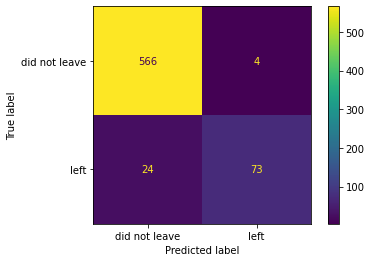

In [32]:
ConfusionMatrixDisplay(cm,display_labels=['did not leave', 'left']).plot()

In [33]:
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate':[0.1, 0.01, 0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda': [0,1.0, 10.0],
    'scale_pos_weight':[1,3,5]
}

In [34]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                subsample=0.9,
                                colsample_bytree=0.5,
                                early_stopping_rounds=10,
                                eval_metric='auc',),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=3,
)

In [35]:
optimal_params.fit(X_train,
                   y_train,
                   eval_set=[(X_test,y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [36]:
param_grid = {
    'max_depth': [4],
    'learning_rate':[0.1, 0.2, 0.3],
    'gamma':[0],
    'reg_lambda': [0],
    'scale_pos_weight':[5,6,7]
}

In [37]:
optimal_params.fit(X_train,
                   y_train,
                   eval_set=[(X_test,y_test)],
                   verbose=False)
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [38]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            early_stopping_rounds=10,
                            eval_metric='aucpr',
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=4,
                            reg_lambda=0,
                            scale_pos_weight=5,
                            subsample=0.9,
                            colsample_bytree=0.5
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose = True,
            eval_set=[(X_test, y_test)])


[0]	validation_0-aucpr:0.71237
[1]	validation_0-aucpr:0.67531
[2]	validation_0-aucpr:0.68956
[3]	validation_0-aucpr:0.68478
[4]	validation_0-aucpr:0.70524
[5]	validation_0-aucpr:0.69057
[6]	validation_0-aucpr:0.69006
[7]	validation_0-aucpr:0.71423
[8]	validation_0-aucpr:0.71844
[9]	validation_0-aucpr:0.72029
[10]	validation_0-aucpr:0.72153
[11]	validation_0-aucpr:0.73552
[12]	validation_0-aucpr:0.73947
[13]	validation_0-aucpr:0.74690
[14]	validation_0-aucpr:0.74568
[15]	validation_0-aucpr:0.75511
[16]	validation_0-aucpr:0.76425
[17]	validation_0-aucpr:0.76587
[18]	validation_0-aucpr:0.76388
[19]	validation_0-aucpr:0.76660
[20]	validation_0-aucpr:0.77235
[21]	validation_0-aucpr:0.77450
[22]	validation_0-aucpr:0.77411
[23]	validation_0-aucpr:0.77786
[24]	validation_0-aucpr:0.78370
[25]	validation_0-aucpr:0.78514
[26]	validation_0-aucpr:0.78870
[27]	validation_0-aucpr:0.78751
[28]	validation_0-aucpr:0.78781
[29]	validation_0-aucpr:0.79255
[30]	validation_0-aucpr:0.79653
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

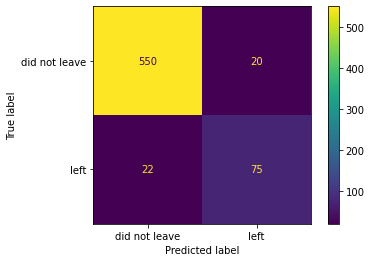

In [39]:
y_pred = clf_xgb.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cm,display_labels=['did not leave', 'left']).plot()

In [40]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            gamma=0,
                            learning_rate=0.1,
                            max_depth=4,
                            reg_lambda=0,
                            scale_pos_weight=5,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            n_estimators=1
                            )
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: '%importance_type, bst.get_score(importance_type=importance_type))

weight:  {'Day_Charge': 5.0, 'Eve_Charge': 3.0, 'Intl_Mins': 3.0, 'CustServ_Calls': 1.0, "Int'l_Plan_no": 2.0, 'VMail_Plan_yes': 1.0}
gain:  {'Day_Charge': 147.15902709960938, 'Eve_Charge': 36.226749420166016, 'Intl_Mins': 34.54825210571289, 'CustServ_Calls': 708.8964233398438, "Int'l_Plan_no": 215.78689575195312, 'VMail_Plan_yes': 98.24359130859375}
cover:  {'Day_Charge': 352.20001220703125, 'Eve_Charge': 108.66666412353516, 'Intl_Mins': 40.66666793823242, 'CustServ_Calls': 741.5, "Int'l_Plan_no": 307.75, 'VMail_Plan_yes': 200.0}
total_gain:  {'Day_Charge': 735.795166015625, 'Eve_Charge': 108.68025207519531, 'Intl_Mins': 103.64476013183594, 'CustServ_Calls': 708.8964233398438, "Int'l_Plan_no": 431.57379150390625, 'VMail_Plan_yes': 98.24359130859375}
total_cover:  {'Day_Charge': 1761.0, 'Eve_Charge': 326.0, 'Intl_Mins': 122.0, 'CustServ_Calls': 741.5, "Int'l_Plan_no": 615.5, 'VMail_Plan_yes': 200.0}


In [42]:
node_params = {'shape':'box',
               'style': 'filled, rounded',
               'fillcolor': '#78cbe'}
leaf_params = {'shape':'box',
               'style': 'filled',
               'fillcolor': '#e48038'}

In [43]:
graph_data = xgb.to_graphviz(clf_xgb, num_trees=0, size="10,10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [44]:
graph_data.view(filename="xgboost_tree_customer_churn")

'xgboost_tree_customer_churn.pdf'

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/farzad/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(process:13820): Gtk-WARNING **: 18:38:19.494: Locale not supported by C library.
	Using the fallback 'C' locale.
/home/farzad/snap/code/common/.cache/gio-modules/libgiolibproxy.so: cannot open shared object file: Permission denied
Failed to load module: /home/farzad/snap/code/common/.cache/gio-modules/libgiolibproxy.so

(evince:13820): Gtk-WARNING **: 18:38:19.526: Theme parsing error: gtk-keys.css:1:0: Failed to import: Error opening file /snap/code/126/usr/share/themes/Default/gtk-3.0/gtk-keys.css: Permission denied
Gtk-Message: 18:38:19.526: Failed to load module "canberra-gtk-module"
Gtk-Message: 18:38:19.527: Failed to load module "canberra-gtk-module"
/home/farzad/snap/code/common/.cache/gio-modules/libdconfsettings.so: cannot open shared object fil